# Initialize Scraping and Buffering

In [9]:
from time import sleep
from redwallpaper import (
    RedWallpaperScraper,
    RedWallpaperBuffer,
    utils
)

# need to modify scraper to use a Queue instead of list!
wallpapers = RedWallpaperScraper.RedWallpaperScraper('top', 'week')
while not wallpapers.loaded:
    sleep(1)
buffer = RedWallpaperBuffer.RedWallpaperBuffer(iter(wallpapers), 'wallpapers0')

In [11]:
while True:
    buffer.buffer()

StopIteration: 

In [12]:
Huangbuffer.directory_buffer

'wallpapers0/tmp9i501bpf'

# Pre-Buffered for Image Processing dev

In [13]:
buffered = list(buffer)

In [14]:
buffer.bufferQ.empty()

True

# Image Processing Dev

In [21]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

def image_cluster(filepath, k):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


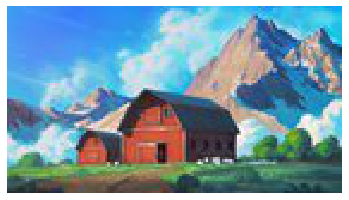

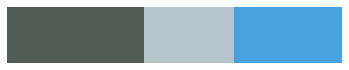

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


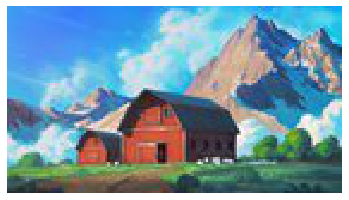

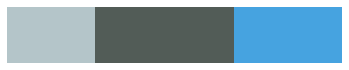

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


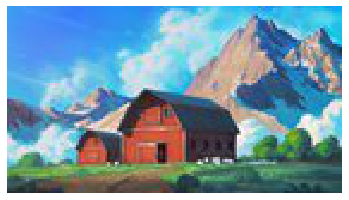

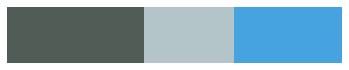

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


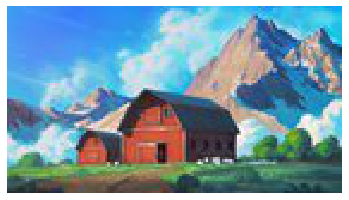

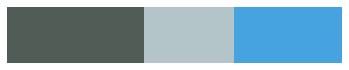

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


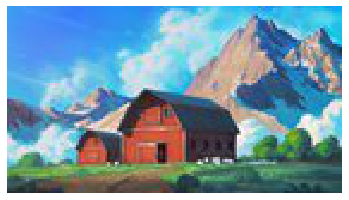

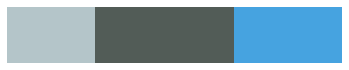

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


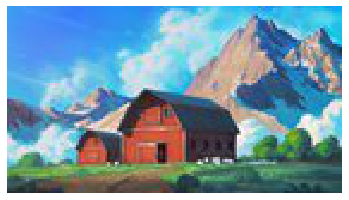

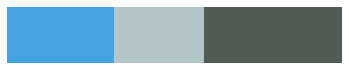

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


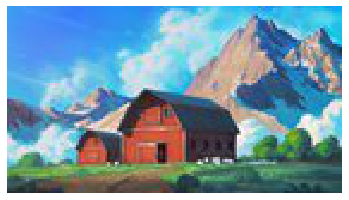

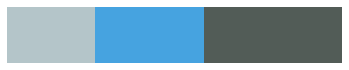

wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg https://i.redd.it/5mreblsx4g041.png


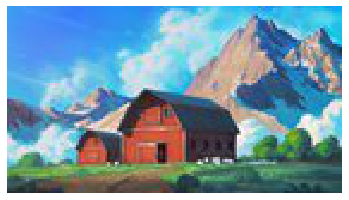

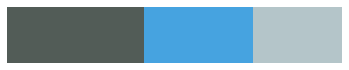

246 ms ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
60521-4714%%timeit
for local, fullsize in buffered:
    print(local, fullsize)
    image_cluster(local, 3)
    break

In [107]:
filepath = 'wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg'

# read-in
image = cv2.imread(filepath)
# BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# flatten
image = image.reshape((image.shape[0] * image.shape[1], 3))

# Cluster
clt = KMeans(n_clusters = 3)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [110]:
# label binning + 1 for np.histogram, right-most/catch-all bucket
numLabels = np.arange(0, len(np.unique(clt.labels_))+1)

hist, labels = np.histogram(clt.labels_, bins = numLabels)
hist = hist.astype("float") # Distribution
hist /= hist.sum()

In [121]:
sorted(list(zip(hist, clt.cluster_centers_)), reverse=True)

[(0.413003663003663, array([82.84013304, 92.73569845, 87.8751663 ])),
 (0.32124542124542127, array([ 70.2041049 , 163.47006842, 224.16419612])),
 (0.26575091575091575, array([180.99069607, 197.78532047, 201.18814611]))]

In [155]:
clt.cluster_centers_.astype('uint8')

array([[180, 197, 201],
       [ 70, 163, 224],
       [ 82,  92,  87]], dtype=uint8)

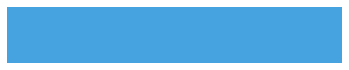

In [115]:
i = 1
bar = plot_colors([1],clt.cluster_centers_[i:i+1])
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

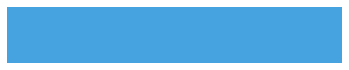

In [156]:
i = 1
bar = plot_colors([1],clt.cluster_centers_.astype('uint8')[i:i+1])
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [162]:
def read_image(filepath, color=None):
    image = cv2.imread(filepath)
    
    if color == 'RGB':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif color == 'LAB':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

In [163]:
def get_colors(image, k=3):
    # Flatten image array
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = k)
    clt.fit(image)
    return clt.cluster_centers_

In [231]:
def convert_colors(image, in_color, out_color):
    image = image.astype('uint8').reshape((1,3,3))
    if in_color == 'RGB':
        if out_color == 'BGR':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        elif out_color == 'LAB':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    elif in_color == 'BGR':
        if out_color == 'RGB':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        elif out_color == 'LAB':
            image = cv2.cv2Color(image, cv2.COLOR_BGR2LAB)

    elif in_color == 'LAB':
        if out_color == 'RGB':
            image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
        elif out_color == 'BGR':
            image = cv2.cv2Color(image, cv2.COLOR_LAB2BGR)
    return image.reshape((3,3))

In [205]:
image = read_image('wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg', color='RGB')

get_colors(image)

array([[ 70.2041049 , 163.47006842, 224.16419612],
       [ 82.86746454,  92.76839539,  87.88674645],
       [181.01586207, 197.80689655, 201.24827586]])

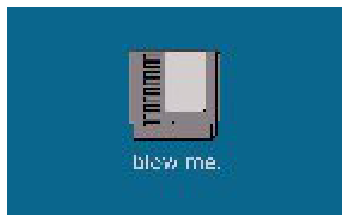

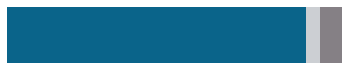

In [172]:
image_cluster(buffered[1][0], 3)

# Color Comparison

In [134]:
from collections import deque

In [135]:
l1 = deque([*range(5)])

In [148]:
l1.rotate()

In [149]:
list(zip(l1, list(range(6,11))))

[(0, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

In [161]:
cv2.cvtColor(clt.cluster_centers_.astype('uint8').reshape((1,3,3)), cv2.COLOR_RGB2LAB)

array([[[200, 123, 124],
        [164, 120,  89],
        [ 97, 123, 130]]], dtype=uint8)

Delta E 94 Resources
- http://zschuessler.github.io/DeltaE/learn/
- https://stackoverflow.com/questions/6630599/are-there-known-implementations-of-the-ciede2000-or-cie94-delta-e-color-differen
- https://opentextbc.ca/graphicdesign/chapter/4-4-lab-colour-space-and-delta-e-measurements/

In [174]:
import math

In [184]:
%%timeit
math.sqrt(234e45)

74.4 ns ± 2.52 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [182]:
math.sqrt(234e45)

4.83735464897913e+23

In [185]:
%%timeit
(234e45)**(.5)

8.05 ns ± 0.206 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [183]:
(234e45)**(.5)

4.83735464897913e+23

In [187]:
%%timeit
pow(234, 10)

337 ns ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [188]:
%%timeit
234 ** 10

8.16 ns ± 0.236 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [189]:
%%timeit
pow(234e45, .5)

105 ns ± 3.19 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [286]:
def delta_e_94(colors):
    Lab1, Lab2 = colors
    
    # Constants
    KL = 2
    K1 = 0.045
    K2 = 0.015
    
    # Variables
    L1, a1, b1 = Lab1.astype('int')
    L2, a2, b2 = Lab2.astype('int')
    
    C1 = (a1**2 + b1**2) ** (0.5)
    C2 = (a2**2 + b2**2) ** (0.5)
    
    delta_L = L1 - L2
    delta_a = a1 - a2
    delta_b = b1 - b2
    delta_C = C1 - C2
    delta_H = (delta_a**2 + delta_b**2 - delta_C**2) ** (0.5)
    
    SL = KL
    SC = 1 + K1*C1
    SH = 1 + K2*C1
    
    # Calculate
    return ((delta_L / SL)**2 + (delta_C / SC)**2 + (delta_H / SH)**2) ** (0.5)

In [191]:
import random

In [198]:
[random.randint(0,200) for _ in range(3)]

[122, 12, 8]

In [204]:
%%timeit
delta_e_94([random.randint(0,200) for _ in range(3)], [random.randint(0,200) for _ in range(3)])

9.51 µs ± 369 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Testing
- http://colorizer.org

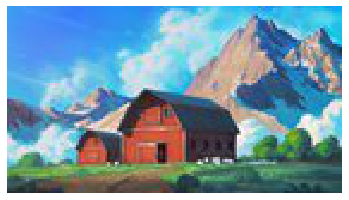

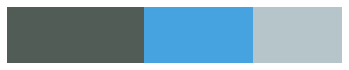

[[ 82.84013304  92.73569845  87.8751663 ]
 [180.92874355 197.79690189 201.22203098]
 [ 70.16062767 163.43109843 224.15577746]]


In [238]:
# Master image

image_cluster('wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg', 3)
image = read_image('wallpapers0/tmp9i501bpf/tmpce2gcuxa.jpg', color='RGB')
colors = get_colors(image)
print(colors)
master_image = convert_colors(colors, 'RGB', 'LAB')

In [298]:
test_images = [convert_colors(get_colors(read_image(i, color='RGB')),'RGB','LAB') for i in [buffered[_][0] for _ in range(1,11)]]

In [248]:
master_image

array([[ 97, 123, 130],
       [200, 123, 124],
       [164, 120,  89]], dtype=uint8)

In [247]:
test_images[0]

array([[101, 118, 100],
       [138, 131, 126],
       [212, 128, 126]], dtype=uint8)

In [269]:
[*i for i in zip(master_image, test_images[0])]

[(array([ 97, 123, 130], dtype=uint8), array([101, 118, 100], dtype=uint8)),
 (array([200, 123, 124], dtype=uint8), array([138, 131, 126], dtype=uint8)),
 (array([164, 120,  89], dtype=uint8), array([212, 128, 126], dtype=uint8))]

In [251]:
deque(master_image)

In [308]:
len(master_image)

3

In [309]:
def min_delta_e(colors1, colors2):
    rotations = len(colors1)
    colors1 = deque(colors1)
    min_delta_e = float('inf')
    for _ in range(rotations):
        min_delta_e = min(sum(map(delta_e_94, zip(colors1, colors2))), min_delta_e)
        colors1.rotate(1)
#         print(min_delta_e)
    return min_delta_e

In [432]:
min_delta_e(master_image, test_images[0])

27.166553697388437

In [446]:
min_delta_e(test_images[0], master_image)

27.26735520878121

In [ ]:
zip()

In [258]:
zip?

In [542]:
test_images[0]

array([[101, 118, 100],
       [138, 131, 126],
       [212, 128, 126]], dtype=uint8)

In [466]:
tmp1 = test_images[0][1]
tmp2 = test_images[0][2]

In [470]:
tmp1

array([138, 131, 126], dtype=uint8)

In [543]:
test_images[0][1] = [212, 128, 126]
test_images[0][2] = [138, 131, 126]

In [545]:
d = deque(test_images[0])

In [562]:
d

deque([array([101, 118, 100], dtype=uint8),
       array([212, 128, 126], dtype=uint8),
       array([138, 131, 126], dtype=uint8)])

In [563]:
list(map(delta_e_94, zip(np.array(d), master_image)))

[6.6099688777837855, 6.051796626032693, 14.605589704964732]

In [561]:
d.rotate()

In [344]:
master_image

array([[ 97, 123, 130],
       [200, 123, 124],
       [164, 120,  89]], dtype=uint8)

In [552]:
delta_e_94((np.array([101, 118, 100]), np.array([97, 123, 130])))

6.6099688777837855

In [554]:
delta_e_94((np.array([138, 131, 126]), np.array([97, 123, 130])))

20.62865704412706

# What is going on???

In [542]:
test_images[0]

array([[101, 118, 100],
       [138, 131, 126],
       [212, 128, 126]], dtype=uint8)

In [564]:
test_images[0][1] = [138, 131, 126]
test_images[0][2] = [212, 128, 126]

In [565]:
d = deque(test_images[0])

In [566]:
d

deque([array([101, 118, 100], dtype=uint8),
       array([138, 131, 126], dtype=uint8),
       array([212, 128, 126], dtype=uint8)])

In [567]:
list(map(delta_e_94, zip(np.array(d), master_image)))

[6.6099688777837855, 31.030010785792104, 25.003980769130038]

In [561]:
d.rotate()

In [344]:
master_image

array([[ 97, 123, 130],
       [200, 123, 124],
       [164, 120,  89]], dtype=uint8)

In [552]:
delta_e_94((np.array([101, 118, 100]), np.array([97, 123, 130])))

6.6099688777837855

In [554]:
delta_e_94((np.array([138, 131, 126]), np.array([97, 123, 130])))

20.62865704412706

# Not a true Cartesian assignment/check with rotations -- IDIOT!

In [570]:
list(product([*range(3)],[*range(3,6)]))

[(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]

In [571]:
tmp = list(product([*range(3)],[*range(3,6)]))

In [603]:
d = deque(tmp)
for _ in range(12):
    print(f'{_}: {list(d)[::4]}')
    d.rotate(-1)
    

0: [(0, 3), (1, 4), (2, 5)]
1: [(0, 4), (1, 5), (0, 3)]
2: [(0, 5), (2, 3), (0, 4)]
3: [(1, 3), (2, 4), (0, 5)]
4: [(1, 4), (2, 5), (1, 3)]
5: [(1, 5), (0, 3), (1, 4)]
6: [(2, 3), (0, 4), (1, 5)]
7: [(2, 4), (0, 5), (2, 3)]
8: [(2, 5), (1, 3), (2, 4)]
9: [(0, 3), (1, 4), (2, 5)]
10: [(0, 4), (1, 5), (0, 3)]
11: [(0, 5), (2, 3), (0, 4)]


In [604]:
from itertools import permutations

In [617]:
for _ in list(permutations([*range(3)])):
    print(list(zip(_, [*range(3,6)])))

[(0, 3), (1, 4), (2, 5)]
[(0, 3), (2, 4), (1, 5)]
[(1, 3), (0, 4), (2, 5)]
[(1, 3), (2, 4), (0, 5)]
[(2, 3), (0, 4), (1, 5)]
[(2, 3), (1, 4), (0, 5)]


In [616]:
list(permutations(master_image))

[(array([ 97, 123, 130], dtype=uint8),
  array([200, 123, 124], dtype=uint8),
  array([164, 120,  89], dtype=uint8)),
 (array([ 97, 123, 130], dtype=uint8),
  array([164, 120,  89], dtype=uint8),
  array([200, 123, 124], dtype=uint8)),
 (array([200, 123, 124], dtype=uint8),
  array([ 97, 123, 130], dtype=uint8),
  array([164, 120,  89], dtype=uint8)),
 (array([200, 123, 124], dtype=uint8),
  array([164, 120,  89], dtype=uint8),
  array([ 97, 123, 130], dtype=uint8)),
 (array([164, 120,  89], dtype=uint8),
  array([ 97, 123, 130], dtype=uint8),
  array([200, 123, 124], dtype=uint8)),
 (array([164, 120,  89], dtype=uint8),
  array([200, 123, 124], dtype=uint8),
  array([ 97, 123, 130], dtype=uint8))]

In [619]:
def min_delta_e(colors1, colors2):
    min_delta_e = float('inf')
    for colors1_ in permutations(colors1):
        min_delta_e = min(sum(map(delta_e_94, zip(colors1_, colors2))), min_delta_e)
    return min_delta_e

In [638]:
def min_delta_e(func):
    def delta_e_func(*args):
        colors1, colors2 = args
        min_delta_e = float('inf')
        for colors1_ in permutations(colors1):
            min_delta_e = min(sum(map(func, zip(colors1_, colors2))), min_delta_e)
        return min_delta_e
    return delta_e_func

In [639]:
de94 = min_delta_e(delta_e_94)

In [640]:
de94(master_image, test_images[0])

27.166553697388437

# Break

In [281]:
import heapq

image 0


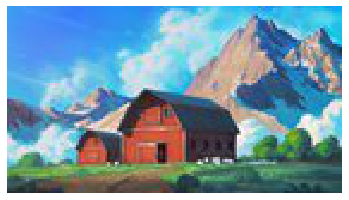

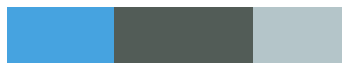

0.0


image 1


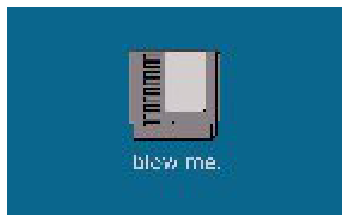

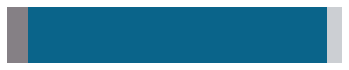

27.166553697388437


image 2


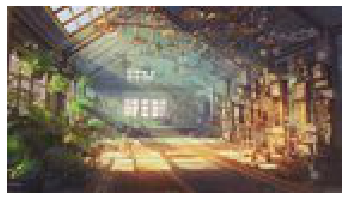

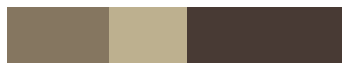

45.50554988003384


image 3


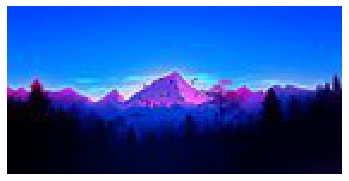

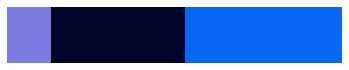

105.70793367465633


image 4


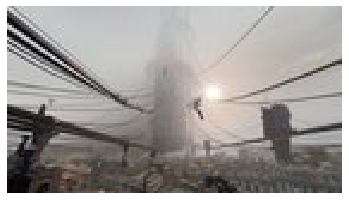

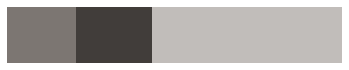

38.31945971932916


image 5


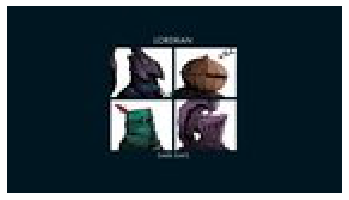

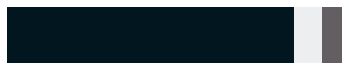

92.13374976011534


image 6


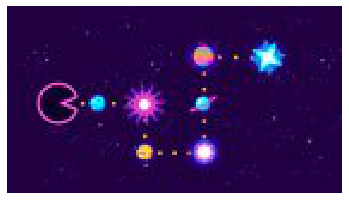

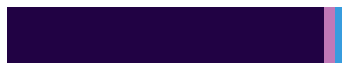

72.64609338345218


image 7


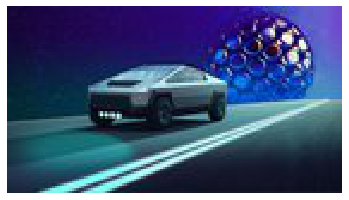

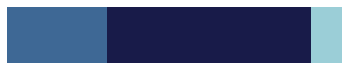

63.56386984618903


image 8


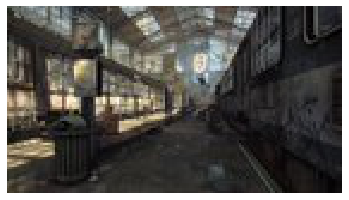

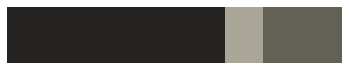

74.81530808468432


image 9


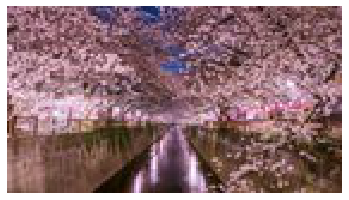

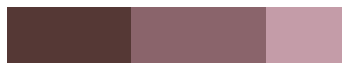

51.69729385013073


image 10


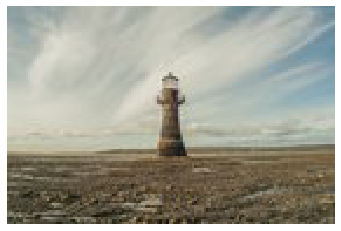

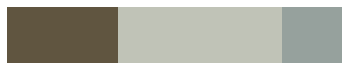

13.602265264377682


image 11


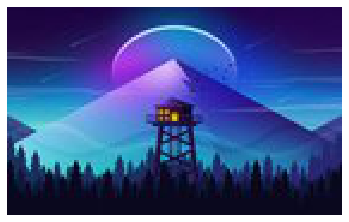

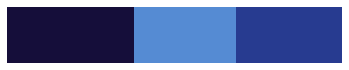

115.91462453047176


image 12


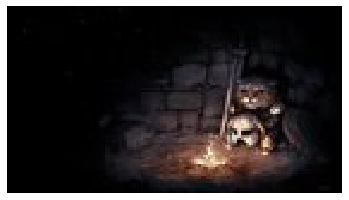

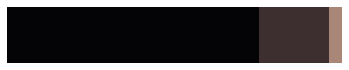

128.19861003801876


image 13


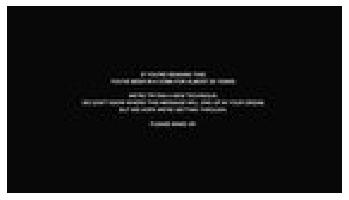

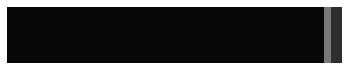

139.50354001444526


image 14


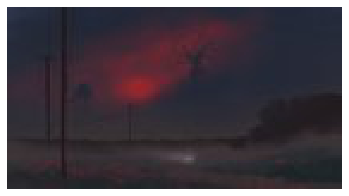

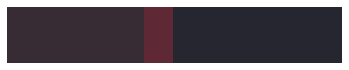

155.2691457827243


image 15


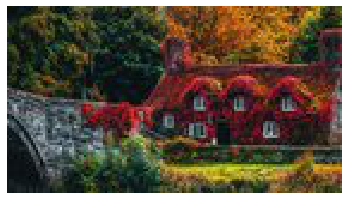

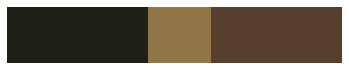

115.88341580413717


image 16


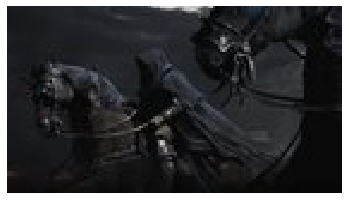

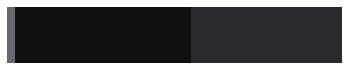

147.53298076065636


image 17


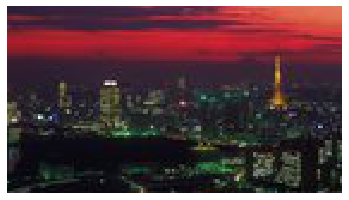

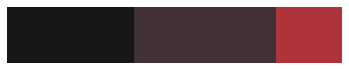

142.1974556154324


image 18


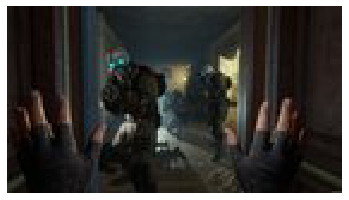

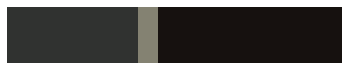

128.60632737538967


image 19


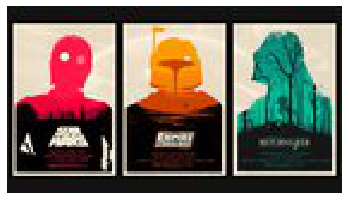

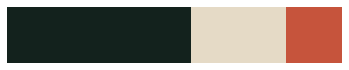

67.76014287451422


image 20


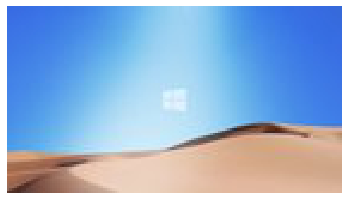

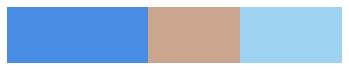

48.138401935200825


image 21


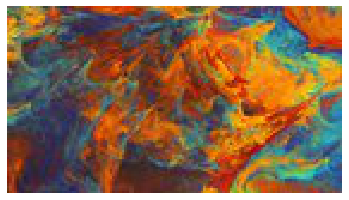

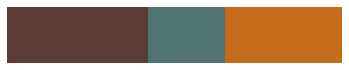

69.41878135316709


image 22


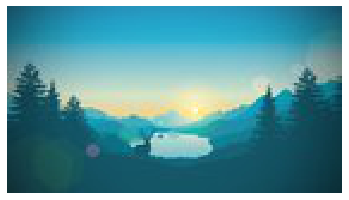

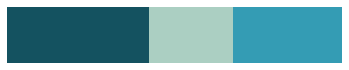

21.5887680781632


image 23


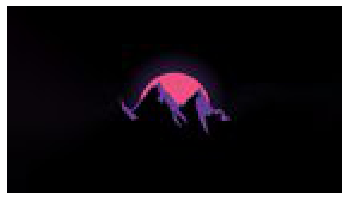

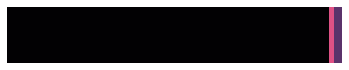

126.16598006268266


image 24


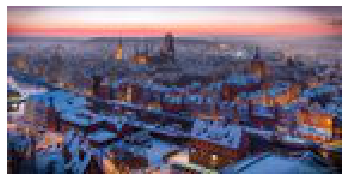

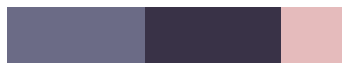

47.56077664103765


image 25


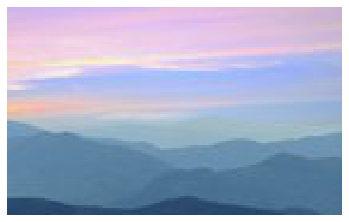

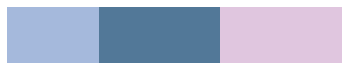

35.94983817116137


image 26


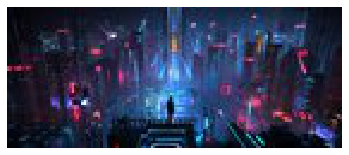

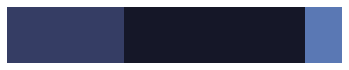

121.77858659965189


image 27


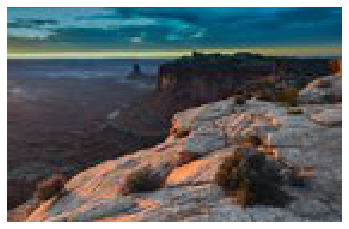

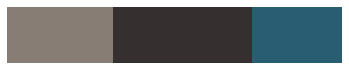

90.64170327314405


image 28


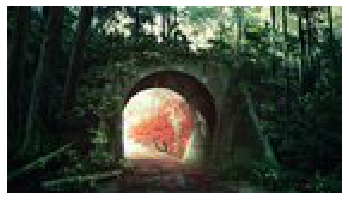

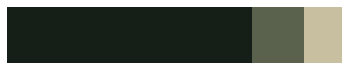

72.08550376698645


image 29


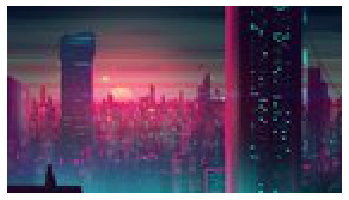

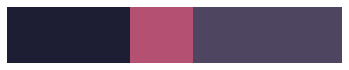

116.26521826688003


image 30


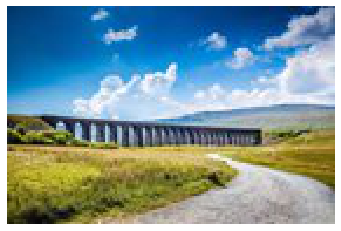

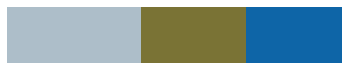

41.21691796597716


image 31


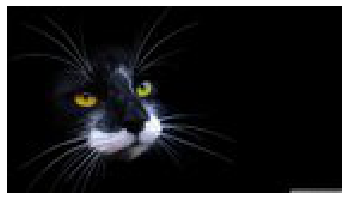

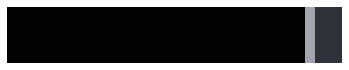

118.0914318418923


image 32


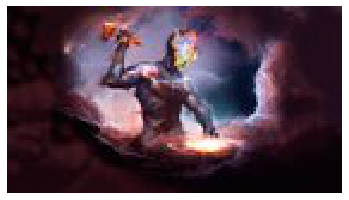

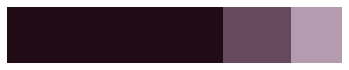

94.72387672393567


image 33


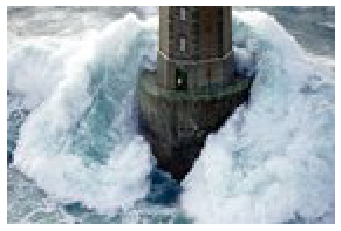

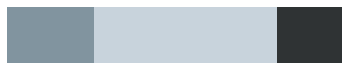

37.31424727365647


image 34


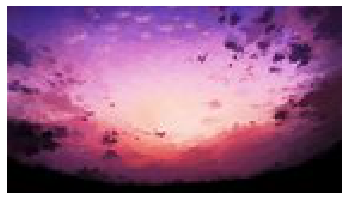

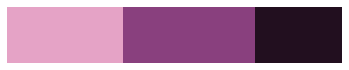

82.6273847561531


image 35


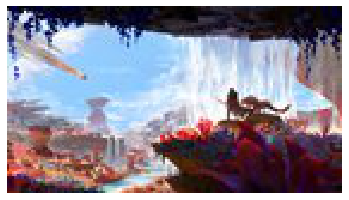

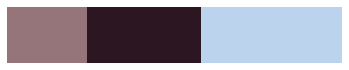

59.304181566206644


image 36


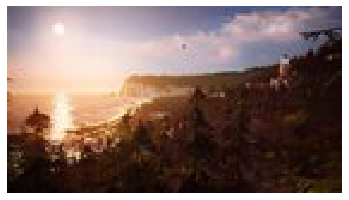

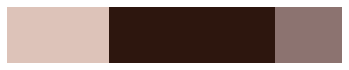

58.21060194314029


image 37


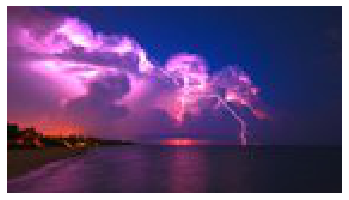

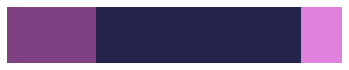

84.7258915659097


image 38


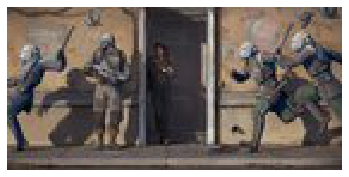

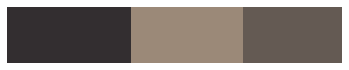

83.00371846657562


image 39


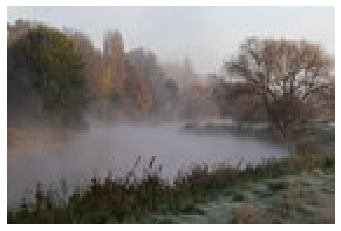

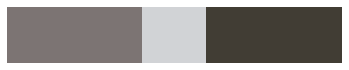

44.33684229895053


image 40


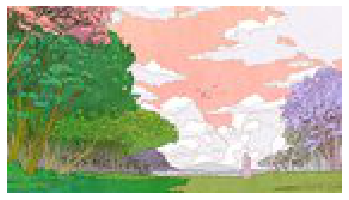

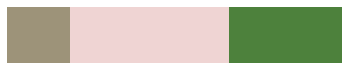

41.432453543090304


image 41


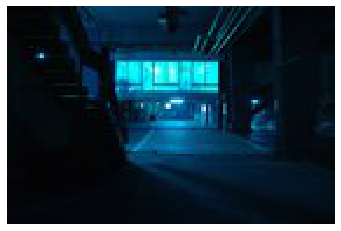

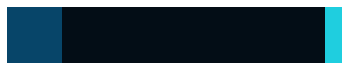

97.28827186513979


image 42


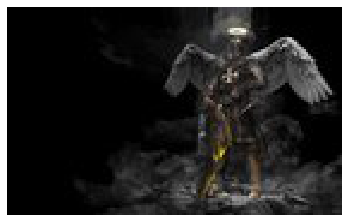

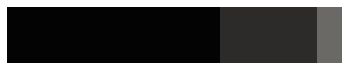

151.4935312141288


image 43


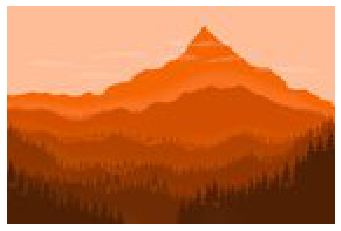

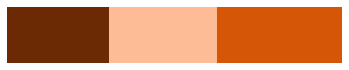

45.095970250109474


image 44


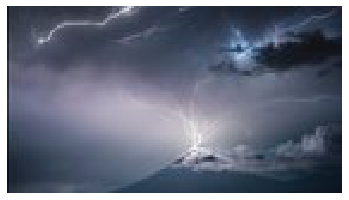

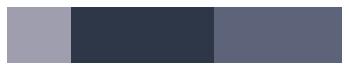

64.12533056858351


image 45


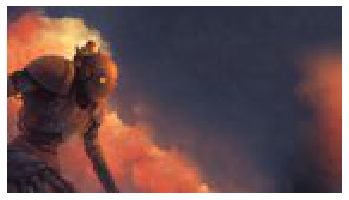

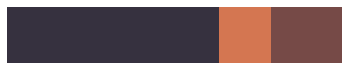

83.31282460164495


image 46


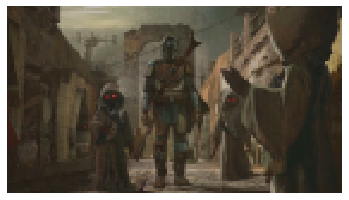

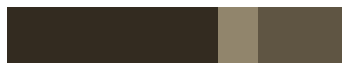

91.05607887858616


image 47


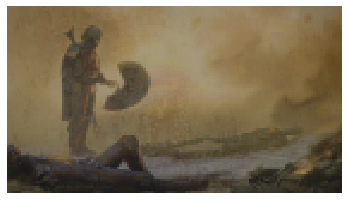

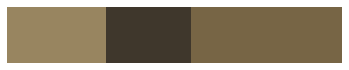

75.46865038760907


image 48


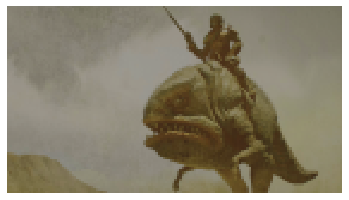

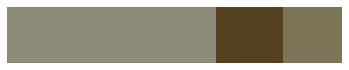

61.72888890434723


image 49


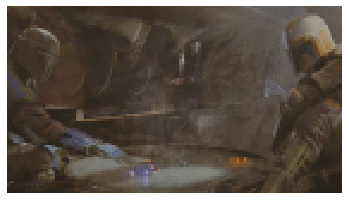

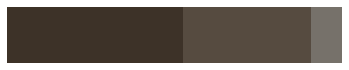

100.51016782963447


image 50


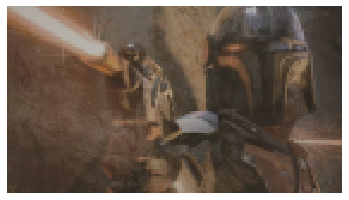

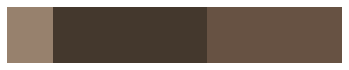

83.1772853492138


image 51


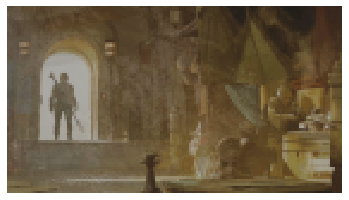

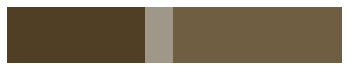

65.8255306973878


image 52


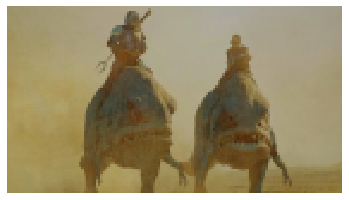

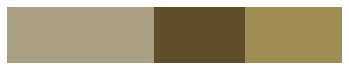

39.37498754731216


image 53


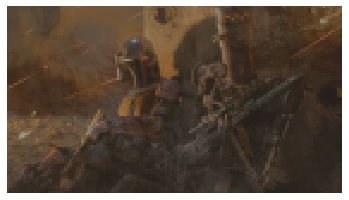

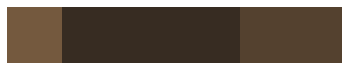

119.11582958852445


image 54


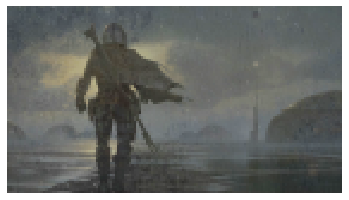

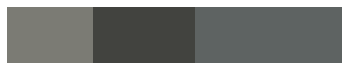

77.33296090249226


image 55


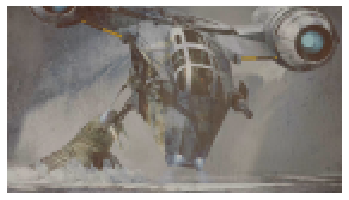

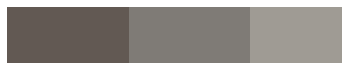

37.56389725426147


image 56


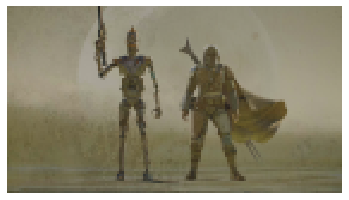

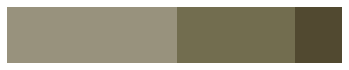

58.213856041299465


image 57


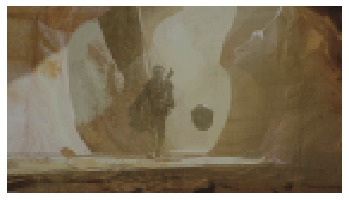

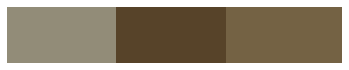

66.21189546762


image 58


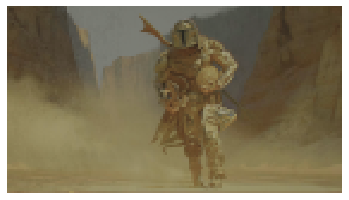

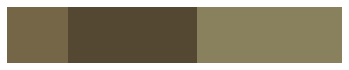

69.59693051917111


image 59


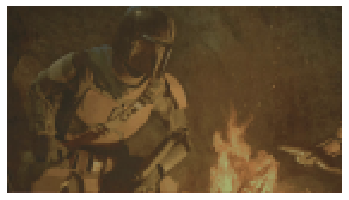

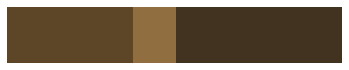

101.63425000440608


image 60


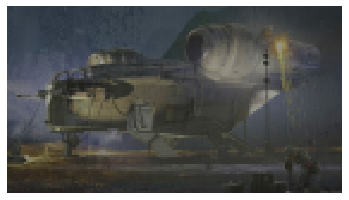

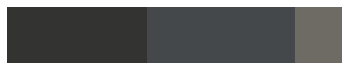

108.30118029849845


image 61


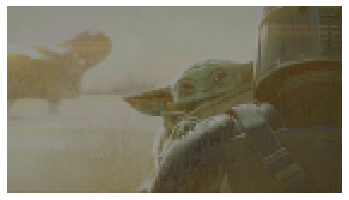

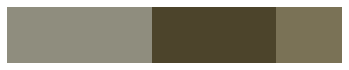

61.41362517355696


image 62


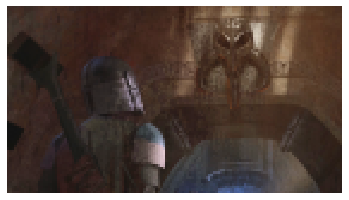

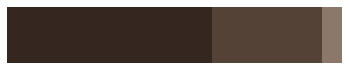

106.42403698248435


image 63


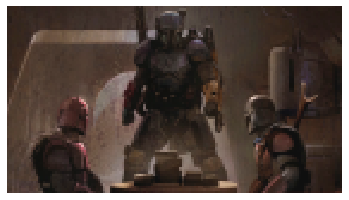

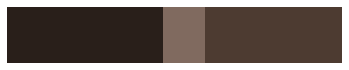

121.29057259811526


image 64


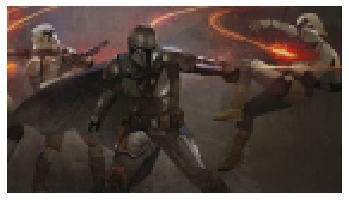

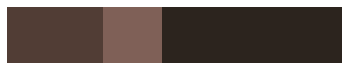

121.38180735290854


image 65


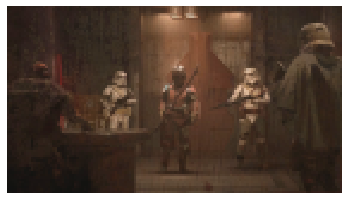

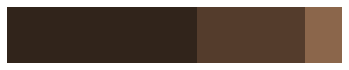

117.62500744768083


image 66


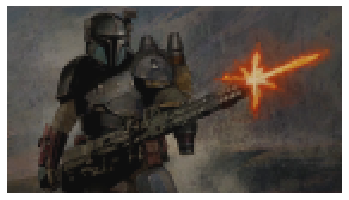

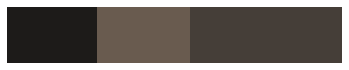

133.1557667415218


image 67


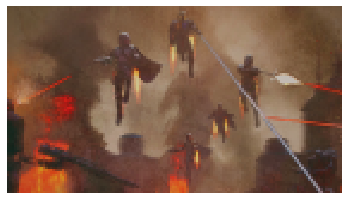

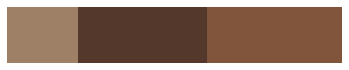

76.63643038580011


image 68


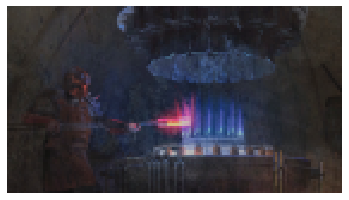

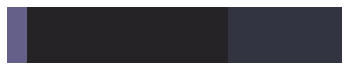

130.31103453457914


image 69


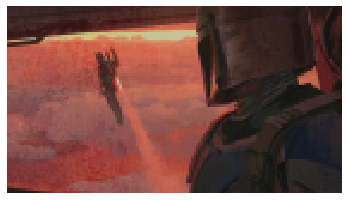

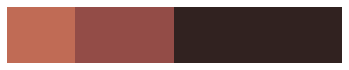

92.2160794797002


image 70


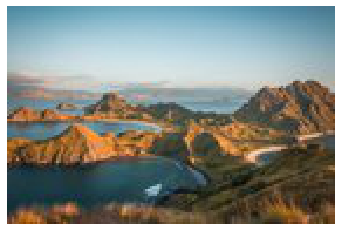

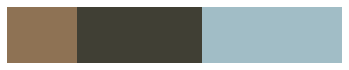

40.94165521741215


image 71


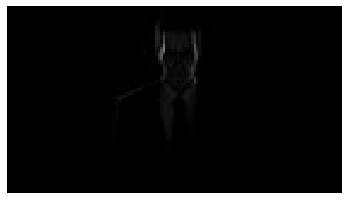

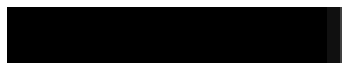

189.96714555051233


image 72


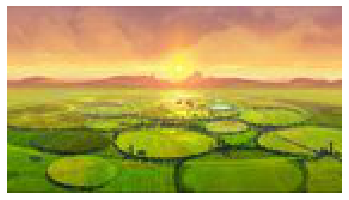

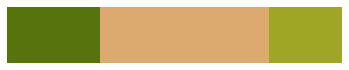

48.147036647329685


image 73


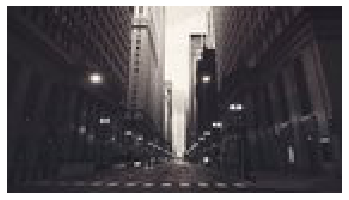

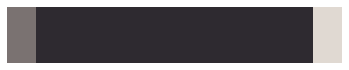

58.96923680608375


image 74


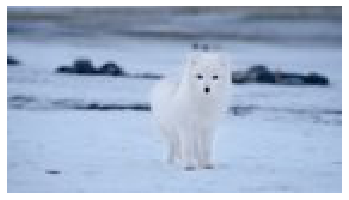

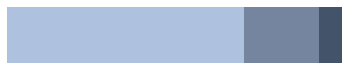

22.120497927079274


image 75


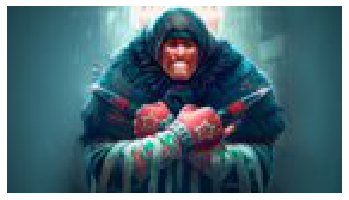

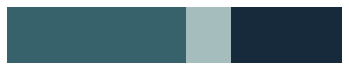

65.76331282460767


image 76


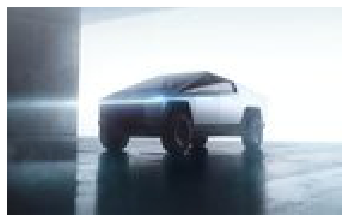

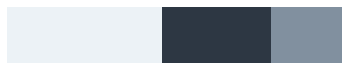

50.3651426283258


image 77


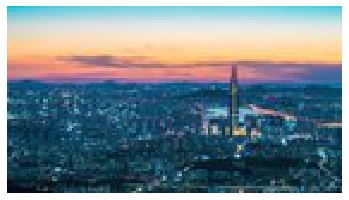

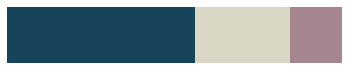

34.381851570044354


image 78


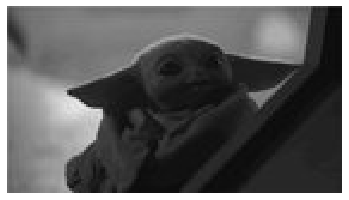

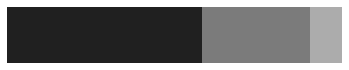

61.18030441735752


image 79


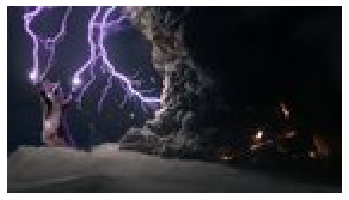

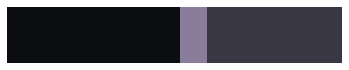

126.83663339819324


image 80


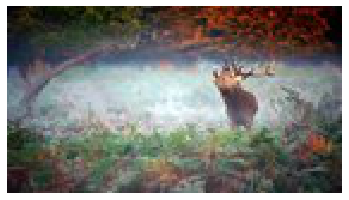

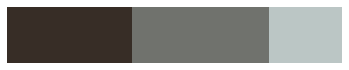

47.082424378508954


image 81


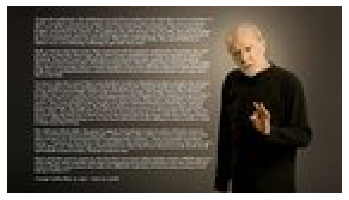

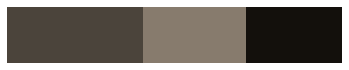

121.13284448210925


image 82


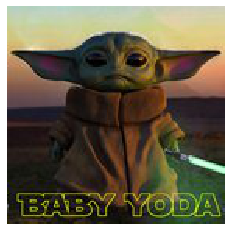

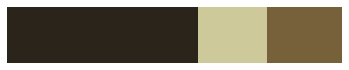

67.58770042794617


image 83


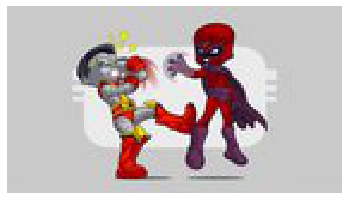

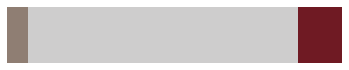

40.12470801952104


image 84


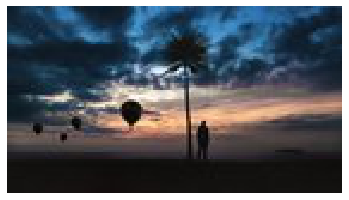

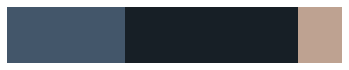

83.73468395756095


image 85


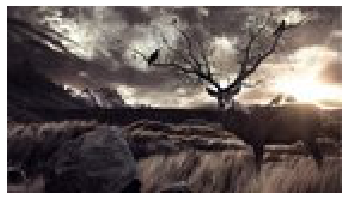

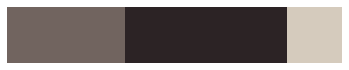

62.975204688374745


image 86


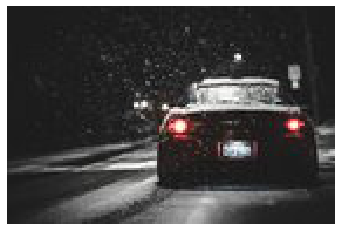

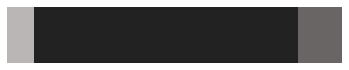

64.95541692678266


image 87


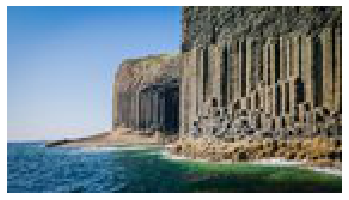

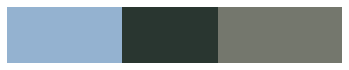

51.71819838146491


image 88


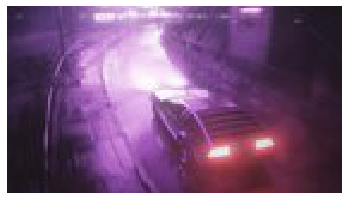

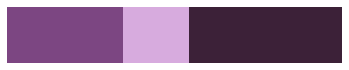

70.57690837119992


image 89


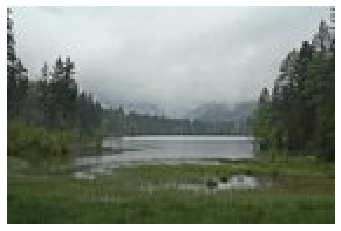

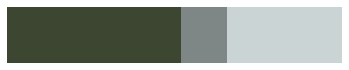

34.24665390241208


image 90


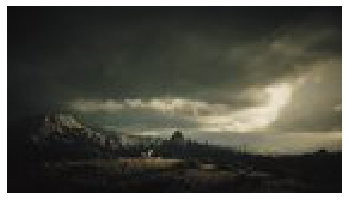

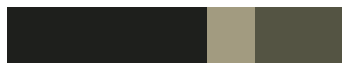

91.21919604403747


image 91


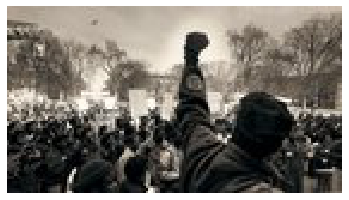

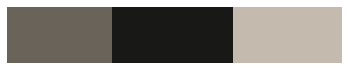

69.8457566648572


image 92


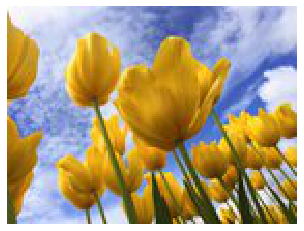

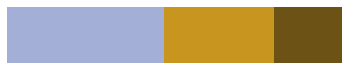

36.64369839398263


image 93


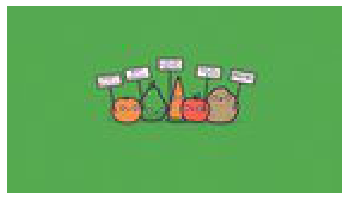

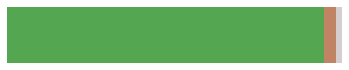

53.263932945847806


image 94


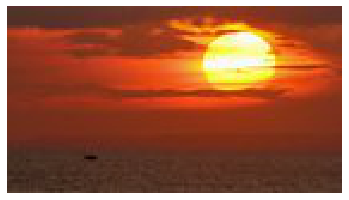

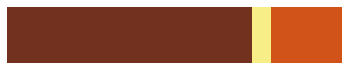

57.206100237293526


image 95


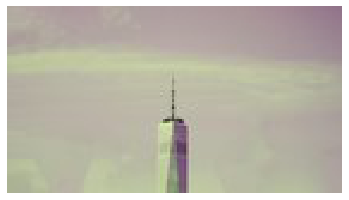

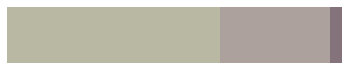

32.70852651464028


image 96


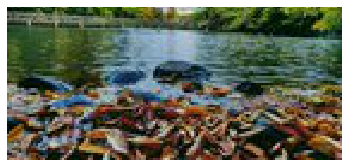

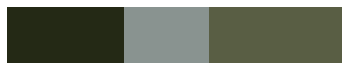

86.9683682997749


image 97


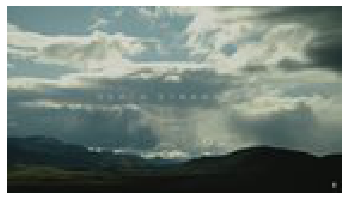

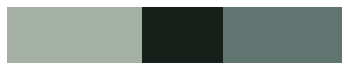

68.77115813725955


image 98


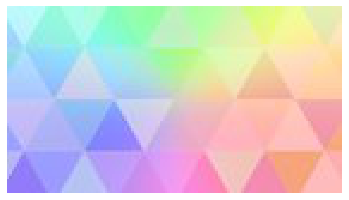

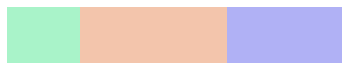

87.39524756984271


image 99


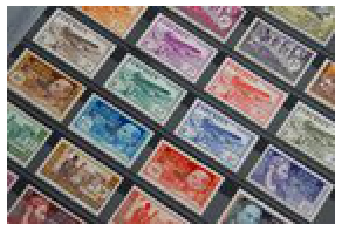

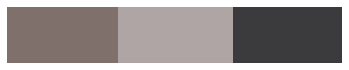

51.53063597158116


image 100


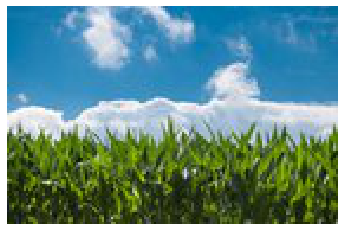

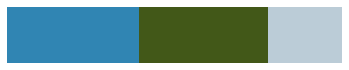

28.266287306277597


image 101


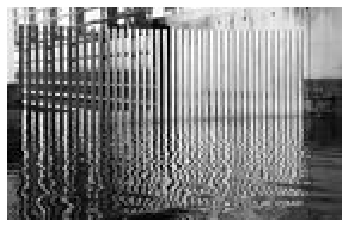

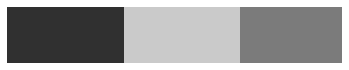

45.23374017891918


image 102


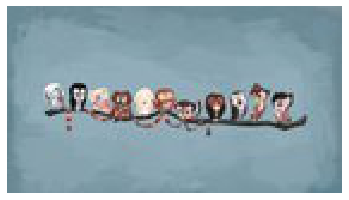

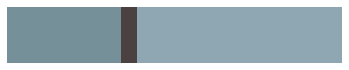

37.67304628898328


image 103


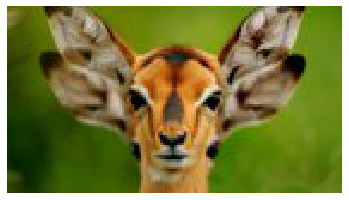

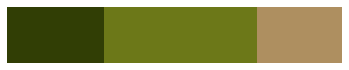

71.85569170010818


image 104


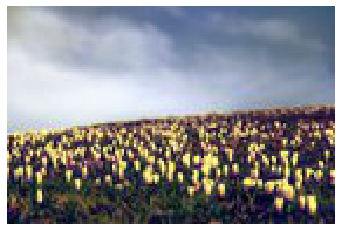

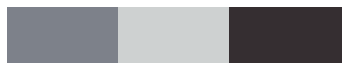

45.02630241793413


image 105


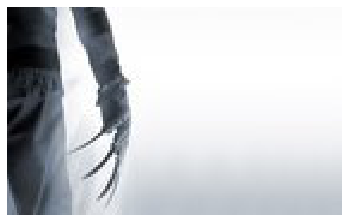

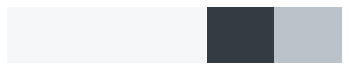

60.72350286707746


image 106


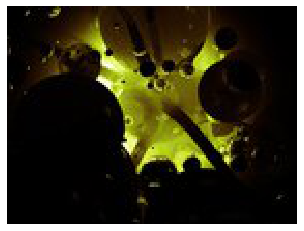

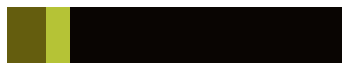

100.74785525914544


image 107


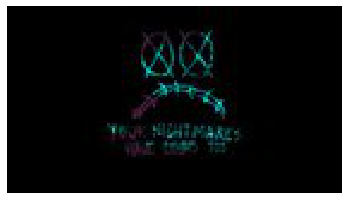

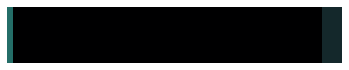

159.14251604376793


image 108


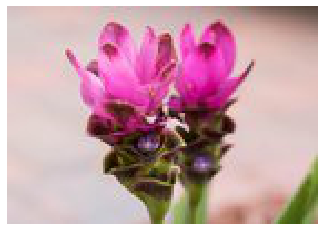

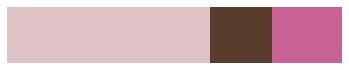

31.00822024430726


image 109


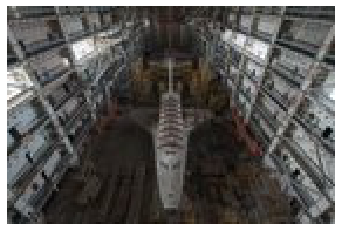

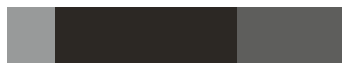

78.74309126863506


image 110


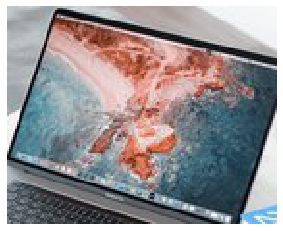

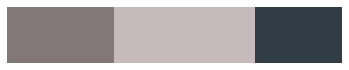

37.96225499333096


image 111


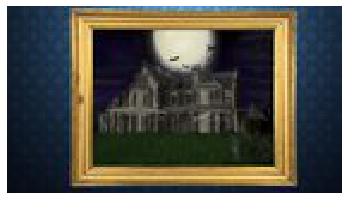

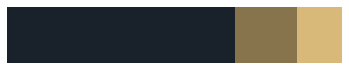

62.768432331371926


image 112


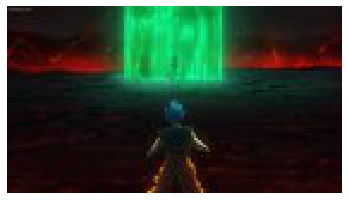

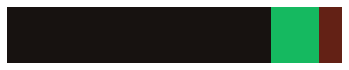

118.89475183999807


image 113


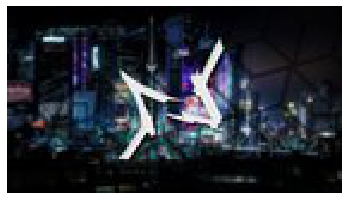

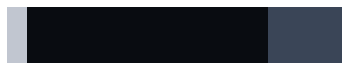

91.81579278529556


image 114


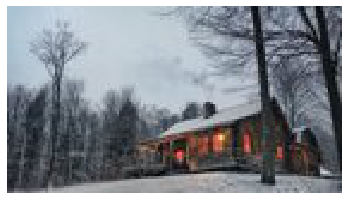

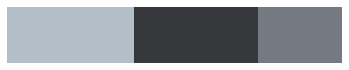

39.33144793121337


image 115


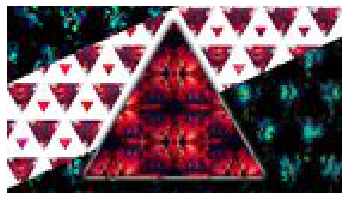

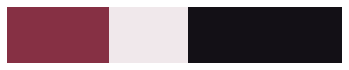

100.55689267798999


image 116


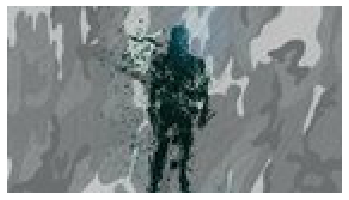

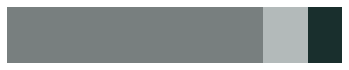

47.8444342825236


image 117


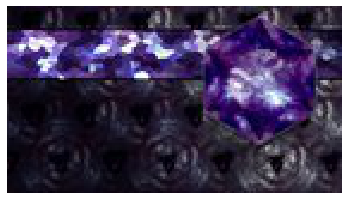

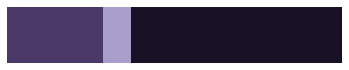

103.22745274262132


image 118


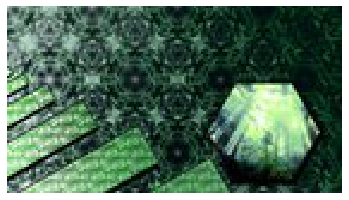

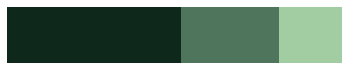

64.76554140975443


image 119


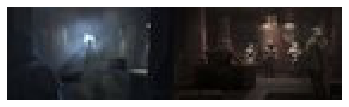

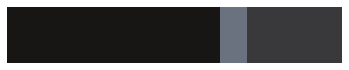

130.6377812239851


image 120


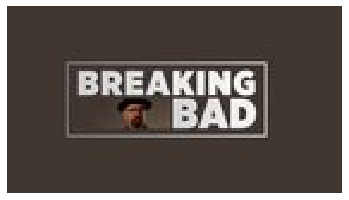

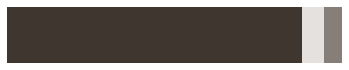

50.32055228519988


image 121


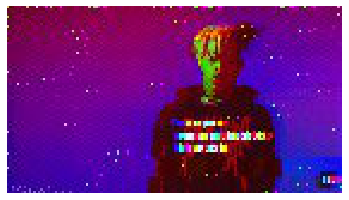

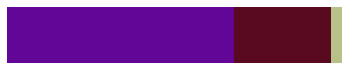

85.57228165831988


image 122


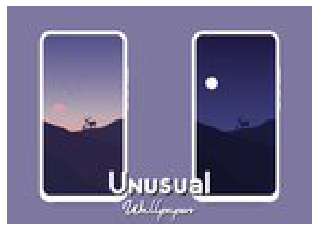

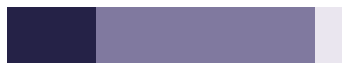

61.70698042836216


image 123


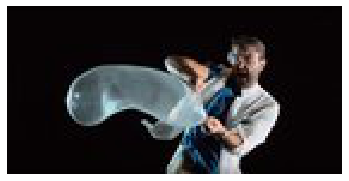

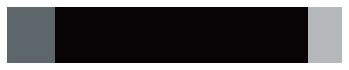

80.20555660460967


image 124


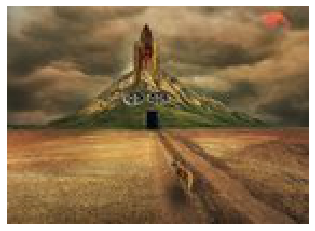

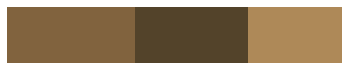

64.77529985459451




In [621]:
for _ in range(0,len(buffered)):
    print(f'image {_}')
    image = buffered[_][0]
    image_cluster(image, 3)
    e = min_delta_e(master_image, convert_colors(get_colors(read_image(image, color='RGB')),'RGB','LAB'))
    print(e)
    print('\n')
    

In [632]:
test_images = [convert_colors(get_colors(read_image(i, color='RGB')),'RGB','LAB') for i in [buffered[_][0] for _ in range(1,11)]]

[min_delta_e(i, master_image) for i in test_images]

[27.26735520878121,
 44.3289258368648,
 105.09145597741147,
 37.75859393040468,
 91.8722499949424,
 71.12386247822741,
 63.66755960348808,
 74.3675925880611,
 51.142636183992934,
 12.33580892783677]

In [633]:
[min_delta_e(master_image, i) for i in test_images]

[27.166553697388437,
 45.50554988003383,
 105.70793367465632,
 38.31945971932916,
 92.13374976011535,
 71.64710755404161,
 63.56386984618903,
 74.81530808468432,
 51.69729385013073,
 13.602265264377682]